In [1]:
from tf_chpvk_pv.dataset import *
import pandas as pd

df = create_dataset()

train_df, test_df = train_test_split_()

2025-03-05 16:24:48.855 | INFO     | tf_chpvk_pv.config:<module>:11 - PROJ_ROOT path is: /home/nomad-lanasc/Documents/Diego Garzon/TF-ChPVK-PV


2025-03-05 16:24:49.725 | INFO     | tf_chpvk_pv.dataset:create_dataset:38 - Processing dataset...
2025-03-05 16:24:50.912 | SUCCESS  | tf_chpvk_pv.dataset:create_dataset:163 - Processing dataset complete.
2025-03-05 16:24:51.185 | INFO     | tf_chpvk_pv.dataset:train_test_split_:177 - Creating train and test dataset...
2025-03-05 16:24:51.200 | SUCCESS  | tf_chpvk_pv.dataset:train_test_split_:211 - Creating train and test dataset complete.


In [2]:
#count the number of material in each class in the training/test sets
dict_ch = {133.15:'F',
           180.61:'Cl',
           198.14:'Se',
           195.56:'Br',
           184.40:'S',
           219.49:'I'
          }

train_df['X'] = train_df.replace({'rX':dict_ch})['rX']
test_df['X'] = test_df.replace({'rX':dict_ch})['rX']

train_vc = pd.DataFrame(train_df[['X', 'exp_label']].groupby('X')['exp_label'].value_counts())
test_vc = pd.DataFrame(test_df[['X', 'exp_label']].groupby('X')['exp_label'].value_counts())

print('In the training set, %s compositions are unstable and %s are stable.' % (train_df['exp_label'].value_counts().values[0], train_df['exp_label'].value_counts().values[1]))
print('The distribution in the training set by anions is the following')
display(train_vc)

print('In the test set, %s compositions are unstable and %s are stable.' % (test_df['exp_label'].value_counts().values[0], test_df['exp_label'].value_counts().values[1]))
print('The distribution in the test set by anions is the following')
display(test_vc)

In the training set, 141 compositions are unstable and 85 are stable.
The distribution in the training set by anions is the following


count
X  exp_label       
Br 0.0           17
   1.0            4
Cl 0.0           43
   1.0           14
F  1.0           40
   0.0           13
I  0.0           29
   1.0            5
S  0.0           26
   1.0           21
Se 0.0           13
   1.0            1

In the test set, 34 compositions are unstable and 23 are stable.
The distribution in the test set by anions is the following


count
X  exp_label       
Br 0.0            5
   1.0            1
Cl 0.0           10
   1.0            4
F  1.0           11
   0.0            2
I  0.0            7
   1.0            2
S  0.0            7
   1.0            5
Se 0.0            3

In [10]:
import glob as gl

files = gl.glob('/home/nomad-lanasc/Documents/Diego Garzon/TF-ChPVK-PV/data/features_space/features/features/*.csv')

['/home/nomad-lanasc/Documents/Diego Garzon/TF-ChPVK-PV/data/features_space/features/features/features_sisso_68.csv',
 '/home/nomad-lanasc/Documents/Diego Garzon/TF-ChPVK-PV/data/features_space/features/features/features_sisso_107.csv',
 '/home/nomad-lanasc/Documents/Diego Garzon/TF-ChPVK-PV/data/features_space/features/features/features_sisso_127.csv',
 '/home/nomad-lanasc/Documents/Diego Garzon/TF-ChPVK-PV/data/features_space/features/features/features_sisso_29.csv',
 '/home/nomad-lanasc/Documents/Diego Garzon/TF-ChPVK-PV/data/features_space/features/features/features_sisso_59.csv',
 '/home/nomad-lanasc/Documents/Diego Garzon/TF-ChPVK-PV/data/features_space/features/features/features_sisso_79.csv',
 '/home/nomad-lanasc/Documents/Diego Garzon/TF-ChPVK-PV/data/features_space/features/features/features_sisso_10.csv',
 '/home/nomad-lanasc/Documents/Diego Garzon/TF-ChPVK-PV/data/features_space/features/features/features_sisso_3.csv',
 '/home/nomad-lanasc/Documents/Diego Garzon/TF-ChPVK-PV

Classification tree accuracy (for t) on the train set: 0.637168.
Classification tree accuracy (for t) on the train set (5 fold CV): 0.606280.
Classification tree accuracy (for t) on the test set: 0.596491.
0.868341 < t < 0.909563 indicates stable perovskites.
Classification tree accuracy (for tau) on the train set: 0.884956.
Classification tree accuracy (for tau) on the train set (5 fold CV): 0.880290.
Classification tree accuracy (for tau) on the test set: 0.824561.
tau < 4.180000 indicates stable perovskites.
Classification tree accuracy (for t_jess) on the train set: 0.725664.
Classification tree accuracy (for t_jess) on the train set (5 fold CV): 0.685990.
Classification tree accuracy (for t_jess) on the test set: 0.631579.
0.835219 < t_jess < 1.022730 indicates stable perovskites.
2025-03-05 16:41:51.234 | INFO     | tf_chpvk_pv.modeling.train:train_tree_sis_features:81 - Training tree model with SISSO features...
Identified expression for t_sisso: (((rA_rX_ratio / log_rA_rB_ratio

KeyError: 't_sisso_68'

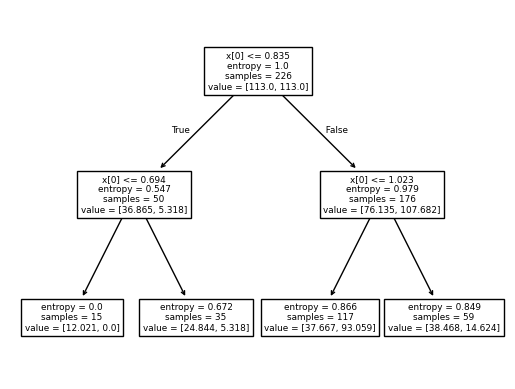

In [15]:
from tf_chpvk_pv.modeling.train import *

train_df, test_df, tolerance_factor_dict = evaluate_t_sisso(t_sisso_expression)

tfs = ['t', 'tau', 't_jess']
tf_tresh = [2, 1, 2]
df_acc =pd.DataFrame()
clfs = {}

for tf, tresh in zip(tfs, tf_tresh):
    df_acc, clf_t = test_tolerance_factor(tf, train_df, test_df, tolerance_factor_dict, df_acc, n_tresh=tresh)
    clfs[tf] = clf_t

for feat in files:
    idx = int(feat.split('/')[-1].split('.csv')[0].split('_')[-1])
    tf = 't_sisso_' + str(idx)
    df = pd.read_csv(feat)
    t_sisso_expression = train_tree_sis_features(feat)
    train_df, test_df, tolerance_factor_dict = evaluate_t_sisso(t_sisso_expression)
    df_acc, clf_t = test_tolerance_factor(tf, train_df, test_df, tolerance_factor_dict, df_acc, n_tresh=1)
    clfs[tf] = clf_t